<a href="https://colab.research.google.com/github/vidyameidita/crudVidya/blob/main/Customer_Churn_Prediction_Vidya_Meidita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [6]:
df_load = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.csv")
print(df_lod.shape)
print(df_load.head())
print(df_load.customerID.nunique())


(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

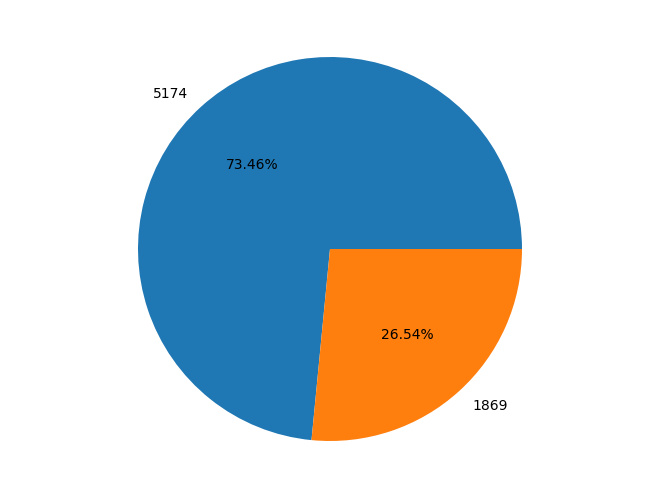

In [9]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
lebels= ['Yes', 'No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=churn, autopct='%1.2f%%')
plt.show()

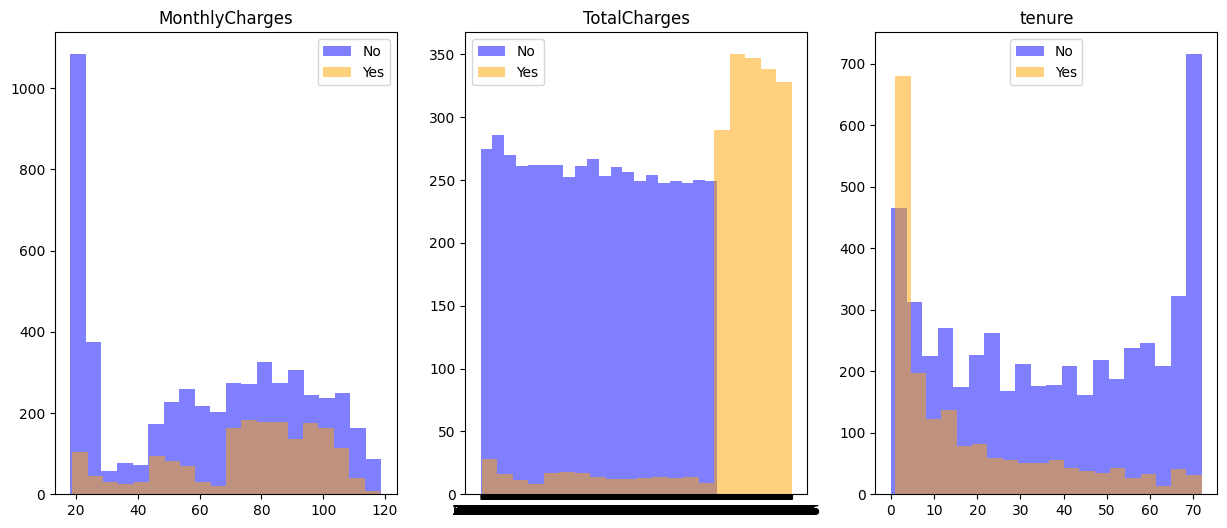

In [11]:
import matplotlib.pyplot as plt

numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']
fig, ax = plt.subplots(1, len(numerical_features), figsize=(15,6))

for i, feature in enumerate(numerical_features):
    # Plot histogram untuk pelanggan yang tidak churn
    ax[i].hist(df_load[df_load.Churn == 'No'][feature].dropna(), bins=20,
               color='blue', alpha=0.5, label='No')
    # Plot histogram untuk pelanggan yang churn
    ax[i].hist(df_load[df_load.Churn == 'Yes'][feature].dropna(), bins=20,
               color='orange', alpha=0.5, label='Yes')

    ax[i].set_title(feature)
    ax[i].legend()

plt.show()

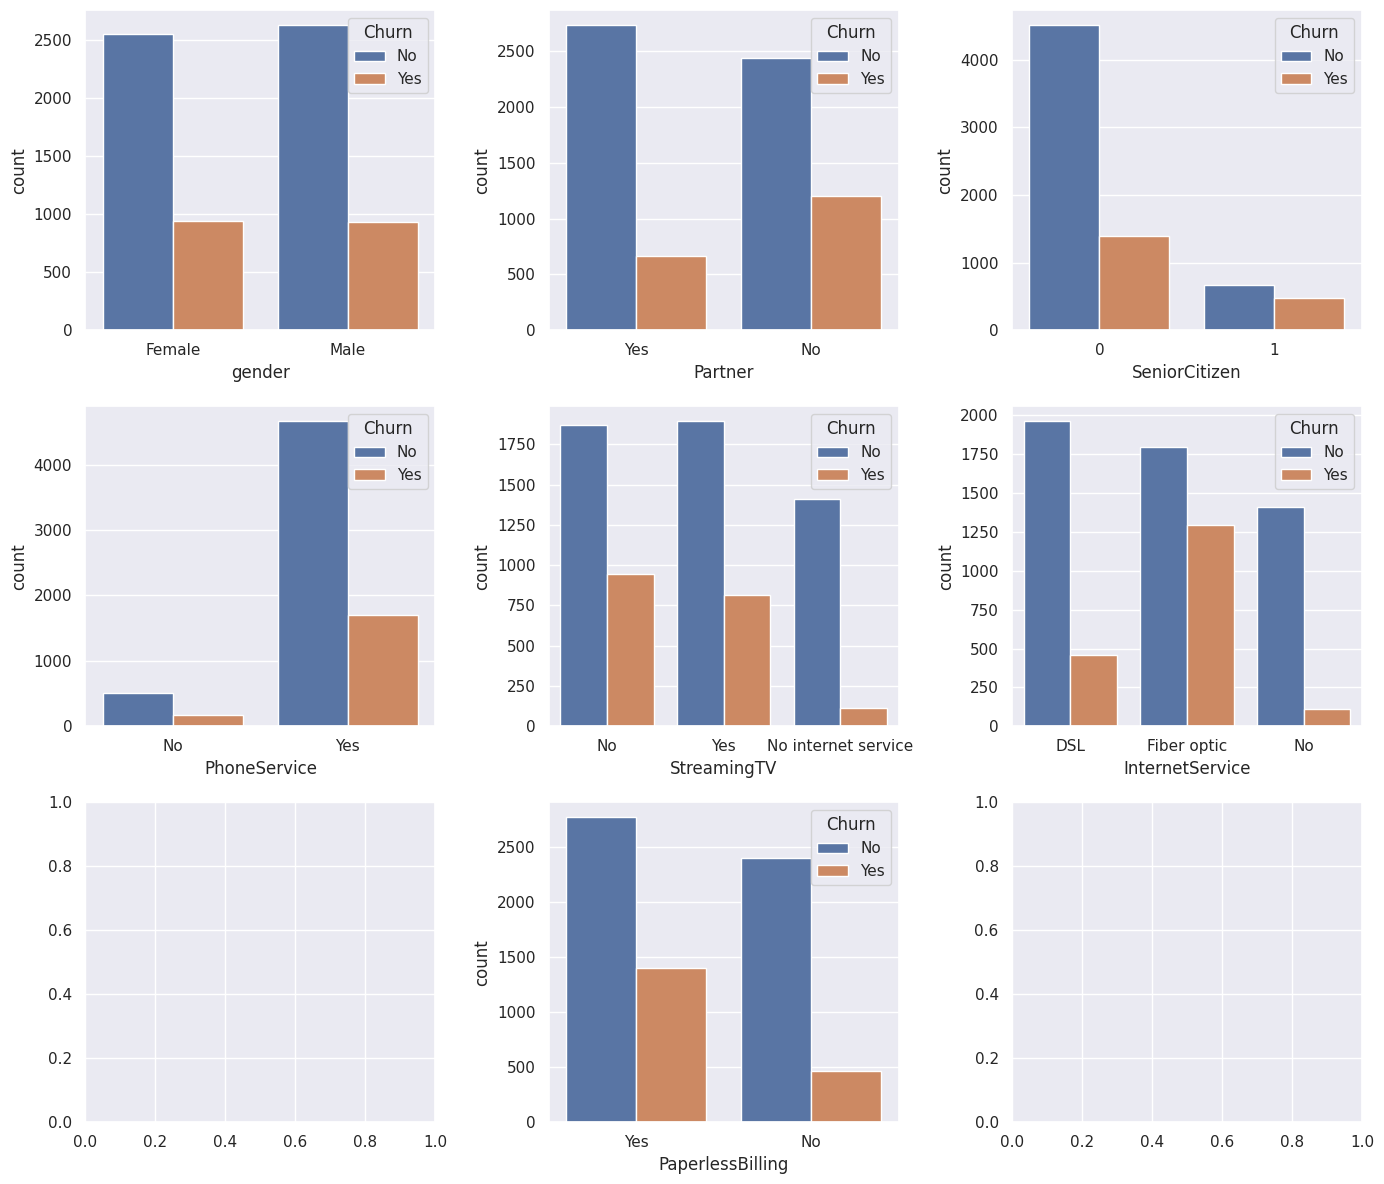

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style='darkgrid')

fig, axes = plt.subplots(3,3, figsize=(14,12)) # Changed 'ac' to 'axes' to avoid confusion and reassign ax
sns.countplot(data=df_load, x='gender', hue='Churn', ax=axes[0][0]) # Indexing the axes array correctly using axes
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=axes[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=axes[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=axes[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=axes[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=axes[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=axes[2][1])
plt.tight_layout()
plt.show()

In [17]:
cleaned_df = df_load.drop(['customerID', 'UpdatedAt'], axis=1, errors='ignore')
print(cleaned_df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [26]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number:
        continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())


            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000

<ipython-input-26-0329894c681a>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-26-0329894c681a>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-26-0329894c681a>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-26-0329894c681a>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number:
<ipython-input-26-0329894c681a>:5: DeprecationWarning: Converting `np.inexact` or `n

In [27]:
from sklearn.model_selection import train_test_split
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,',sedangkan Jumlah Baris dan kolom dari y_train adalah:', y_train.shape )
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,',sedangkan Jumlah Baris dan kolom dari y_test adalah:', y_test.shape )
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4930, 19) ,sedangkan Jumlah Baris dan kolom dari y_train adalah: (4930,)
Prosentase Churn di data Training adalah:
Churn
0    0.737323
1    0.262677
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2113, 19) ,sedangkan Jumlah Baris dan kolom dari y_test adalah: (2113,)
Prosentase Churn di data Testing adalah:
Churn
0    0.728348
1    0.271652
Name: proportion, dtype: float64


In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic regression yang terbentuk adalah: \n', log_model)

Model Logistic regression yang terbentuk adalah: 
 LogisticRegression()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Menghasilkan prediksi pada data training
y_train_pred = log_model.predict(x_train)

# Menghitung dan menampilkan classification report
print("Classification Report pada Data Training:")
print(classification_report(y_train, y_train_pred))

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix pada Data Training:")
print(confusion_matrix(y_train, y_train_pred))


Classification Report pada Data Training:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3635
           1       0.64      0.52      0.58      1295

    accuracy                           0.80      4930
   macro avg       0.74      0.71      0.72      4930
weighted avg       0.79      0.80      0.79      4930

Confusion Matrix pada Data Training:
[[3263  372]
 [ 621  674]]
